In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inputfile = "../data/Erlin.csv"
outputfile = "../data/Erlin_normalization.csv"

In [3]:
df = pd.read_csv(inputfile, parse_dates=True)

In [4]:
exclude = ["datetime", "WIND_DIREC"]
columns = [column for column in df.columns if column not in exclude]

In [5]:
print columns

['AMB_TEMP', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'RAINFALL', 'RH', 'SO2', 'WIND_SPEED']


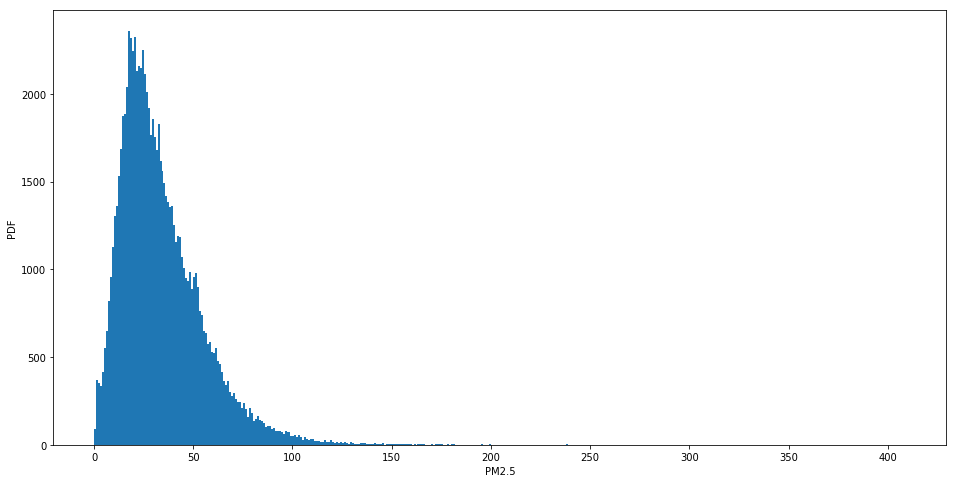

In [6]:
plt.rcParams['figure.figsize'] = [16.0, 8.0]
plt.xlabel("PM2.5")
plt.ylabel("PDF")
plt.hist(df["PM2.5"], bins = np.arange(0, max(df["PM2.5"])))
plt.show()

In [7]:
new = df[columns]

In [9]:
#norm = (new - new.min()) / (new.max() - new.min())
#norm = (new - new.mean()) / new.std()
norm = new / new.sum()

In [10]:
norm['datetime'] = df.datetime
cols = norm.columns.tolist()
cols = cols[-1:] + cols[:-1]
norm = norm[cols]

In [11]:
norm.head()

,datetime,AMB_TEMP,CO,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,WIND_SPEED
0,2007-01-01 00:00:00,0.000008,0.000012,0.000011,0.000011,0.000011,0.000003,0.000008,0.000006,0.0,0.000013,7.001118e-07,0.000002
1,2007-01-01 01:00:00,0.000008,0.000012,0.000029,0.000012,0.000015,0.000002,0.000007,0.000007,0.0,0.000013,7.001118e-07,0.000002
2,2007-01-01 02:00:00,0.000008,0.000015,0.000014,0.000011,0.000012,0.000002,0.000004,0.000007,0.0,0.000013,3.500559e-07,0.000002
3,2007-01-01 03:00:00,0.000008,0.000014,0.000013,0.000012,0.000012,0.000001,0.000004,0.000009,0.0,0.000013,3.500559e-07,0.000002
4,2007-01-01 04:00:00,0.000008,0.000015,0.000034,0.000012,0.000016,0.000001,0.000006,0.000007,0.0,0.000013,7.001118e-07,0.000004


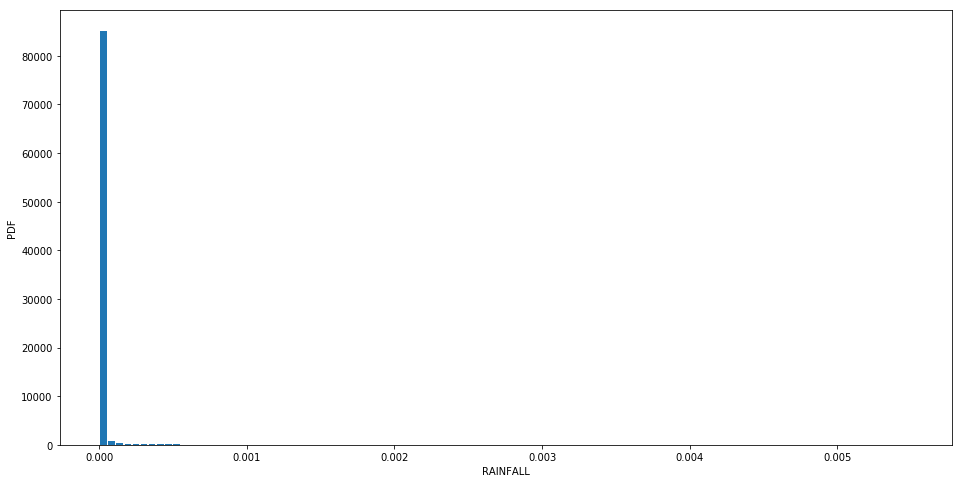

In [14]:
plt.rcParams['figure.figsize'] = [16.0, 8.0]
plt.xlabel("PM2.5")
plt.ylabel("PDF")
plt.hist(norm["PM2.5"], 100, rwidth=0.8)
plt.show()

In [13]:
norm.to_csv(outputfile, index=False)